[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PongthepGeo/ML_22/blob/master/05_file_handling.ipynb)

### File handling in Python

Python can handle file extension formats, listed some of them as the table below. 

File extension  | Describsion
-------------   | -------------
csv             | microsoft excel spreadsheet is commonly used considered as tabular data
png, jpg        | image files are typically stored array as RGB (three channels)
tiff, jp2       | metadata is data structure that contains array and geocoordinates
JSON            | a JSON format is target for a web application that contains text-based, human readable, and numbers
HDF5            | hierarchical data format 5 file (HDF5) contains multidimensional array in which DL platforms such as TensrFlow and Keras used
~~pickle~~      | no pickle here, JSON instead


#### 1. Handling csv file using Pandas

Ensure that we installed pandas, checking and install using commands below.

```bat
pip list | pip install pandas
```

We initiate %matplotlib inline before calling Python libraries, and this command will use to ensure the plot result will save as a static extended file, **.png**. For interactive visualization, we can use %matplotlib notebook.  

In [ ]:
%matplotlib inline

import pandas as pd

data = pd.read_csv('../datasets/welllog_csv/welllogs.csv')
data[0:5] 

In [ ]:
print(data.describe())

We explore the first five rows of the data and statistically verify (data.describe()).

#### 2. Image files

Computer vision using DL methods requires the intuitive data that are available as an image. To display images having extension **.png** and **.jpg** use Python package called PIL. However, Python community provides more developing packages to manipulate an image as well, i.e., Matplotlib, OpenCV, skimage etc.

```bat
pip list | pip install Pillow
```

In [ ]:
%matplotlib inline

from PIL import Image
print(Image.__version__)

img = Image.open('../dataset/rocks/Granite_0063.jpeg')
img


### 3. Handling satellite imagery 

Typical Tag Image File Format (TIFF) uses for storing a raster file, which can preserve raw data. However, satellite imagery requires georeferences to tag extra information in the image so that TIFF and compressed bitmap images saved in the JPEG 2002 (JP2) are commonly used in this field. They can provide additional information such as spatial extent, CRS, resolution, and footprint. Our class will cover how to manipulate metadata using **rasterio** and **geopandas**.

```bat
pip list | pip install rasterio | pip install geopandas
```

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1705, 'height': 2219, 'count': 23, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 100.01896272303799,
       0.0, -8.983152841195215e-05, 8.586187317142798), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


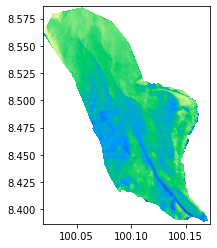

<AxesSubplot:>

In [9]:
%matplotlib inline

import geopandas
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

src = rasterio.open('../dataset/tiff_file/ew2020-07-20.tif')
print(src.profile)
show(src.read(1), transform=src.transform, cmap='terrain')

We print project taged in tiff file to verify the georeferences.  
* width: 1705
* height: 2219
* count: 23 (number of bands)
* CRS: epsg 4326



#### 4. JSON

JavaScript Object Notation (JSON) is favored data structure in web applications because it can transmit and receive data in a hierarchical format, see the table below. This advantage provides more flexibility than tabular data, in which the numbers of rows and columns have to be the same size. For example, one person may have more than one address so tabular data will contain **none**. When read JSON file in Python, JSON object needs to convert string in Python; see the table conversion. 

Python      | JSON
----------- | -------------
dict        | object
list, tuple | array
str         | string
int         | number
float       | number
True        | true
False       | false
None        | null

Python reads JSON file as dictionary.

```python
data = '{"student name": "Pongthep", "home town": ["Bangkok", "Ubon"]}'
```
https://www.programiz.com/python-programming/json

In [1]:
import json

person = '{"name": "Bob", "languages": ["English", "French"]}'
person_dict = json.loads(person)

# Output: {'name': 'Bob', 'languages': ['English', 'French']}
print( person_dict)

# Output: ['English', 'French']
print(person_dict['languages'])

{'name': 'Bob', 'languages': ['English', 'French']}
['English', 'French']
